In [1]:
import numpy as np
import matplotlib.pyplot as plt

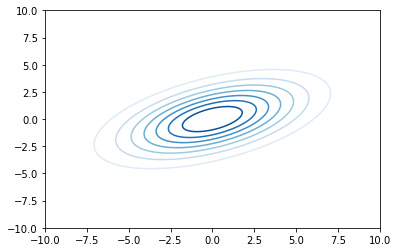

In [2]:
#parámetros distribución
sigma_x = 12.
sigma_y = 5.
sigma_xy = 4.
sigma = np.array([[sigma_x,sigma_xy],[sigma_xy,sigma_y]])
sigma_det = np.linalg.det(sigma)
inv_s = np.linalg.inv(sigma)

#gráfico
size = 300
x = np.linspace(-10, 10, size)
y = np.linspace(-10, 10, size)
x, y = np.meshgrid(x, y)
z = 1/(2*np.pi*np.sqrt(sigma_det)) * np.exp(-1/2*(x**2*inv_s[0,0] + x*y*(inv_s[1,0]+inv_s[0,1]) + y**2*inv_s[1,1]))
plt.contour(x, y, z, cmap='Blues')

(-7.5, 7.5)

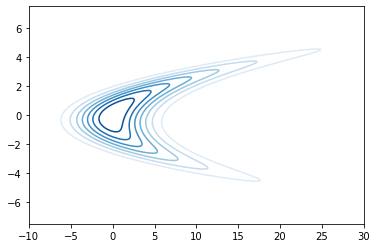

In [4]:
#transformación
x2 = x + y**2

#graficos
plt.contour(x2, y, z, cmap='Blues')
plt.xlim([-10,30])
plt.ylim([-7.5,7.5])



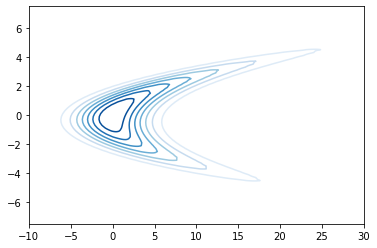

In [8]:
#define parametros de grafico 
x_t = np.linspace(-30, 30, size)
y_t = np.linspace(-30, 30, size)
x_t, y_t = np.meshgrid(x_t, y_t)

#densidad banana
z_t = 1/(2*np.pi*np.sqrt(sigma_det)) * np.exp(-1/2*((x_t-y_t**2)**2*inv_s[0,0] + (x_t-y_t**2)*y_t*(inv_s[1,0]+inv_s[0,1]) + y_t**2*inv_s[1,1]))

#grafico
plt.contour(x_t, y_t, z_t, cmap='Blues')
plt.xlim([-10,30])
plt.ylim([-7.5,7.5]);

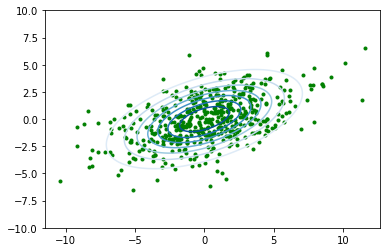

In [18]:
x_s, y_s = np.random.multivariate_normal([0,0], sigma, 500).T
plt.plot(x_s, y_s, 'g.')
plt.contour(x, y, z, cmap='Blues');

plt.savefig('ex_gaussiana.pdf', bbox_inches='tight', pad_inches=0)

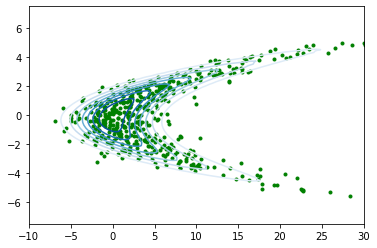

In [19]:
#muestras gaussiana
x_s, y_s = np.random.multivariate_normal([0,0], sigma, 500).T

#transformación
x2_s = x_s + y_s**2


#grafico
plt.plot(x2_s, y_s, 'g.') #samples
plt.contour(x_t, y_t, z_t, cmap='Blues') #densidad
plt.xlim([-10,30])
plt.ylim([-7.5,7.5]);

plt.savefig('ex_banana.pdf', bbox_inches='tight', pad_inches=0)

In [20]:
n = 50000
var = 10
sigma_0 = np.eye(2)*var
det0 = np.linalg.det(sigma_0)
inv_s0 = np.eye(2)/var

current = np.array([0,0])
prob_current = 1/(2*np.pi*np.sqrt(det0)) * np.exp(-1/2*((current[0]-current[1]**2)**2*inv_s0[0,0] + (current[0]-current[1]**2)*current[1]*(inv_s0[1,0]+inv_s0[0,1]) + current[1]**2*inv_s0[1,1]))
samples = []
samples.append(current)

for i in range(n):
    cand = np.random.multivariate_normal(current, sigma_0)
    prob_cand = 1/(2*np.pi*np.sqrt(det0)) * np.exp(-1/2*((cand[0]-cand[1]**2)**2*inv_s0[0,0] + (cand[0]-cand[1]**2)*cand[1]*(inv_s0[1,0]+inv_s0[0,1]) + cand[1]**2*inv_s0[1,1]))
    ratio = prob_cand/prob_current
    if ratio > np.random.rand():
        samples.append(cand)
        prob_current = prob_cand
        current = cand
    else:
        samples.append(current)
            
samples = np.array(samples)
    


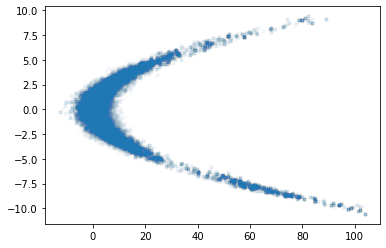

In [21]:
plt.plot(samples[:,0],samples[:,1],'.',alpha=0.01)